In [11]:
import sys
sys.path.append('../../sparsedense')

In [12]:
import numpy as np
np.random.seed(458913)

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
import sparsedensefast as sd

In [15]:
K, alpha, sigma, c= 100, 6, 0.7, 5
Z = sd.sample_from_ibp(K, alpha, sigma, c)

adj = Z.transpose() @ Z
g = nx.from_scipy_sparse_matrix(adj)
for n in g.nodes():
    g.remove_edge(n, n)
    
print("Number of links:", g.number_of_edges())
print("Number of nodes:", g.number_of_nodes())

Number of links: 1383
Number of nodes: 338


In [17]:
alpha0, sigma0, c0, lamb0 = 3, 0.3, 0, 10
links = list(g.edges())
model = sd.NetworkFull(links=links, alpha=alpha0, sigma=sigma0, lamb=lamb0, c=c0)

In [18]:
# Warmup doing some splitmerge
print("iter {:2d}   num. cliques: {:5d}".format(0, model.num_cliques))
for i in range(10):
    model.splitmerge(N=10000)
    print("iter {:2d}   num. cliques: {:5d}".format(i + 1, model.num_cliques))

iter  0   num. cliques:  1383
iter  1   num. cliques:   112
iter  2   num. cliques:   103
iter  3   num. cliques:   103
iter  4   num. cliques:   102
iter  5   num. cliques:   102
iter  6   num. cliques:   102
iter  7   num. cliques:   102
iter  8   num. cliques:   102
iter  9   num. cliques:   102
iter 10   num. cliques:   102


In [19]:
# Now optimise / split alternating
model.fit(num_iters=10, num_sm=1000,
          num_optim=20000, save_every=1, 
          optim_momentum=0.5, optim_backtracktol=3.0,
          write_every=1, filename='fit_recovers_prior.pkl')

iter:     0, K:   102, alpha:    5.401, sigma: 0.786, c:    5.021, lamb:    55, lp:     -863.815
writing to file...
done!
iter:     1, K:   102, alpha:    5.399, sigma: 0.756, c:    5.019, lamb:    58, lp:     -863.205
writing to file...
done!
iter:     2, K:   102, alpha:    5.399, sigma: 0.765, c:    5.019, lamb:    55, lp:     -863.128
writing to file...
done!
iter:     3, K:   102, alpha:    5.400, sigma: 0.760, c:    5.019, lamb:    58, lp:     -863.149
writing to file...
done!
iter:     4, K:   102, alpha:    5.399, sigma: 0.745, c:    5.018, lamb:    51, lp:     -863.641
writing to file...
done!
iter:     5, K:   102, alpha:    5.401, sigma: 0.766, c:    5.020, lamb:    52, lp:     -863.136
writing to file...
done!
iter:     6, K:   102, alpha:    5.403, sigma: 0.795, c:    5.018, lamb:    44, lp:     -864.534
writing to file...
done!
iter:     7, K:   102, alpha:    5.400, sigma: 0.755, c:    5.017, lamb:    48, lp:     -863.250
writing to file...
done!
iter:     8, K:   102, a

In [21]:
Z_hat = sd.sample_from_ibp(model.num_cliques, model.alpha, model.sigma, model.c)

adj = Z_hat.transpose() @ Z_hat
g_hat = nx.from_scipy_sparse_matrix(adj)
for n in g_hat.nodes():
    g_hat.remove_edge(n, n)
    
print("Number of links:", g_hat.number_of_edges())
print("Number of nodes:", g_hat.number_of_nodes())

Number of links: 1321
Number of nodes: 323


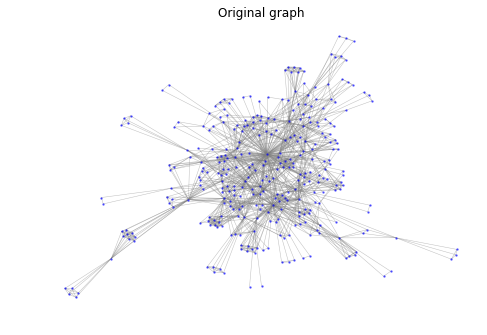

In [22]:
comps = sorted(nx.connected_component_subgraphs(g), 
               key=lambda x: x.number_of_nodes(), 
               reverse=True)

nx.draw(comps[0], edge_color="grey", 
        node_color="blue", node_size=2,
        alpha=0.5, width=0.5)

plt.title("Original graph")
plt.show()

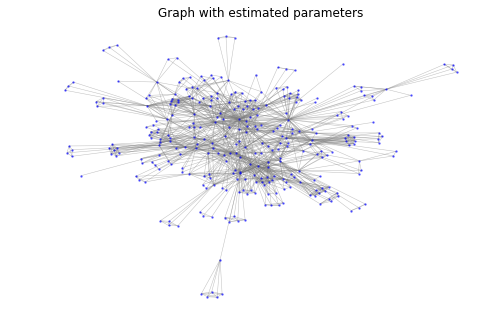

In [23]:
comps_hat = sorted(nx.connected_component_subgraphs(g_hat), 
               key=lambda x: x.number_of_nodes(), 
               reverse=True)

nx.draw(comps_hat[0], edge_color="grey", 
        node_color="blue", node_size=2,
        alpha=0.5, width=0.5)

plt.title("Graph with estimated parameters")
plt.show()